# Cartpole problem - Reinforcement Learning

In [2]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

### Creating environment

In [3]:
env = gym.make('CartPole-v0')

### Q table creation

In [4]:
def q_table():

    tot_bins = 20
    space_size_obs = len(env.observation_space.high)

    # each bucket size are found
    bins = [np.linspace(-4.8, 4.8, tot_bins), np.linspace(-4, 4, tot_bins), np.linspace(-.418, .418, tot_bins), np.linspace(-4, 4, tot_bins)]

    qTable = np.random.uniform(low=-2, high=0, size=([tot_bins] * space_size_obs + [env.action_space.n]))

    return bins, space_size_obs, qTable

### Defining the variables 

In [5]:
lr = 0.1
# Gamma should be between 1 and 0.
gamma = 0.95
episodes = 10000  # total number of episodes
update = 2000  # when to update
timestep = 100  # timesteps given

Episode: 0 Average: 17.0 Min: 17 Max: 17
Episode: 100 Average: 21.31 Min: 8 Max: 60
Episode: 200 Average: 21.21 Min: 8 Max: 54
Episode: 300 Average: 21.47 Min: 9 Max: 52
Episode: 400 Average: 22.99 Min: 8 Max: 78
Episode: 500 Average: 26.11 Min: 9 Max: 120
Episode: 600 Average: 29.37 Min: 8 Max: 103
Episode: 700 Average: 27.99 Min: 10 Max: 72
Episode: 800 Average: 29.07 Min: 8 Max: 111
Episode: 900 Average: 33.87 Min: 10 Max: 111
Episode: 1000 Average: 32.64 Min: 10 Max: 122
Episode: 1100 Average: 34.97 Min: 9 Max: 111
Episode: 1200 Average: 40.28 Min: 10 Max: 146
Episode: 1300 Average: 39.54 Min: 9 Max: 114
Episode: 1400 Average: 50.07 Min: 10 Max: 184
Episode: 1500 Average: 42.47 Min: 10 Max: 154
Episode: 1600 Average: 48.97 Min: 12 Max: 139
Episode: 1700 Average: 51.02 Min: 11 Max: 127
Episode: 1800 Average: 55.87 Min: 10 Max: 134
Episode: 1900 Average: 55.87 Min: 12 Max: 138
Episode: 2000 Average: 58.92 Min: 9 Max: 164
Episode: 2100 Average: 61.14 Min: 11 Max: 180
Episode: 2200 Ave

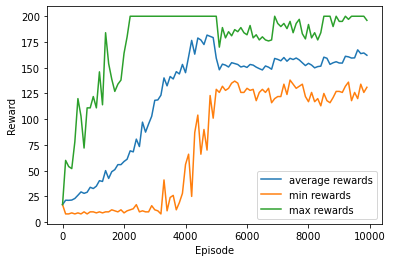

In [8]:
epsilon = 1  # this value will be decayed
epsilon_decaying_start = 1
epsilon_decaying_end = episodes // 2
epsilon_decay_value = epsilon / (epsilon_decaying_end - epsilon_decaying_start)

# For q table, discrete state index is given
def d_state(state, bins, space_size_obs):
    index = []
    for i in range(space_size_obs):
        index.append(np.digitize(state[i], bins[i]) - 1) 
    return tuple(index)


bins, space_size_obs, qTable = q_table()

prev_count = []   #array to store scores after each episode
metrics = {'eps': [], 'avg_rew': [], 'min_rew': [], 'max_rew': []}  # for plot

for episode in range(episodes):
    state_discrete = d_state(env.reset(), bins, space_size_obs)
    done = False   
    count = 0  

    while not done:
        if episode % update == 0:
            env.render()  

        count += 1
        #Q table for action
        if np.random.random() > epsilon:
            action = np.argmax(qTable[state_discrete])
      
        else:
            action = np.random.randint(0, env.action_space.n)
        newState, reward, done, _ = env.step(action) 

        discretestate_new = d_state(newState, bins, space_size_obs)

        futureQ_max = np.max(qTable[discretestate_new])  # future value estimation
        currentQ = qTable[state_discrete + (action, )]  # Current value
        # giving penalty
        if done and count < 200:
            reward = -375

        # Calculation of Q values
        newQ = (1 - lr) * currentQ + lr * (reward + gamma * futureQ_max)
        qTable[state_discrete + (action, )] = newQ  # New q value is updated

        state_discrete = discretestate_new

    prev_count.append(count)

    # If the episode number is inside the decaying range, every episode is decayed.
    if epsilon_decaying_end >= episode >= epsilon_decaying_start:
        epsilon -= epsilon_decay_value

    # for graph
    if episode % timestep == 0:
        latestepisode = prev_count[-timestep:]
        avg_count = sum(latestepisode) / len(latestepisode)
        metrics['eps'].append(episode)
        metrics['avg_rew'].append(avg_count)
        metrics['min_rew'].append(min(latestepisode))
        metrics['max_rew'].append(max(latestepisode))
        print("Episode:", episode, "Average:", avg_count, "Min:", min(latestepisode), "Max:", max(latestepisode))


env.close()

# Plot graph
plt.plot(metrics['eps'], metrics['avg_rew'], label="average rewards")
plt.plot(metrics['eps'], metrics['min_rew'], label="min rewards")
plt.plot(metrics['eps'], metrics['max_rew'], label="max rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend(loc=4)
plt.show()